In [1]:
import pandas as pd
import numpy as np

In [3]:
import emoji

In [4]:
df = pd.read_csv('BA_reviews.csv')

In [5]:
df.sample(9)

,Unnamed: 0,Review,Stars,Date,Country
758,758,✅ Trip Verified | Overall a very comfortable ...,3,14th January 2020,India
458,458,✅ Trip Verified | Washington to London. Our fl...,5,7th July 2022,United States
13,13,✅ Trip Verified | I sat in the plane at Vienna...,2,31st May 2024,Austria
262,262,Not Verified | Top Ten REASONS to not use Brit...,1,23rd May 2023,United States
640,640,✅ Trip Verified | The entertainment system wa...,3,26th August 2021,Russian Federation
632,632,✅ Trip Verified | Very pleasant flight to Lis...,1,21st September 2021,United Kingdom
30,30,✅ Trip Verified | We chose Rotterdam and Lond...,1,12th April 2024,Netherlands
427,427,✅ Trip Verified | Flight was 1 hour late leav...,9,14th September 2022,United Kingdom
520,520,Not Verified | Shout out to the help desk at ...,1,12th April 2022,United States


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   Review      1000 non-null   object
 2   Stars       1000 non-null   int64 
 3   Date        1000 non-null   object
 4   Country     1000 non-null   object
dtypes: int64(2), object(3)
memory usage: 39.2+ KB


In [54]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
split_columns = df['Review'].str.split('|', n=1, expand=True)

# Assign the results to 'Verification Status' and 'Review'
df['Verification Status'] = split_columns[0]
df['Review'] = split_columns[1].fillna(split_columns[0])

# Handle rows where there was no '|', putting the entire text into 'Review' and leaving 'Verification Status' empty
df['Verification Status'] = df['Verification Status'].where(df['Review'] != df['Verification Status'], '')


In [9]:
df =  df.drop(df.columns[0], axis=1)

In [10]:
def remove_emojis(text):
    if text is not None:  # Handle None values
        return emoji.replace_emoji(text, replace='')
    else:
        return text  # Return None as is or replace with an empty string if preferred



In [11]:
df['Review'] = df['Review'].apply(remove_emojis)

In [12]:
df['Verification Status'] = df['Verification Status'].apply(remove_emojis)

In [13]:
df['Verification Status'].unique()

array([' Trip Verified ', 'Not Verified ', 'cNot Verified ',
       ' Not Verified '], dtype=object)

In [14]:
df['Verification Status'] = df['Verification Status'].str.contains("Trip Verified|Verified Review")

In [15]:
df['Review'] = df['Review'].str.strip()

In [16]:
df.sample(5)

,Review,Stars,Date,Country,Verification Status
774,Budapest to Billund return via London on 18 an...,3,2019-12-29,Vietnam,True
943,Seems like no one was aware of my existence on...,2,2019-07-15,United Kingdom,True
776,Sydney to Toulouse via Singapore / London. Boe...,1,2019-12-27,Australia,False
250,"May 3, flew from Seattle to Heathrow then to E...",3,2023-06-06,United States,False
865,Gatwick to Alicante. 3.5 hours (1 hour sitting...,8,2019-09-30,United Kingdom,True


In [17]:
df = df.dropna()
df['Stars'] = df['Stars'].astype(int)

In [18]:
df.isna().sum()

Review                 0
Stars                  0
Date                   0
Country                0
Verification Status    0
dtype: int64

In [19]:
df['Country'].unique()

array(['United Kingdom', 'United States', 'Austria', 'South Africa',
       'Canada', 'Italy', 'Denmark', 'Singapore', 'Netherlands',
       'Belgium', 'Australia', 'Nigeria', 'Japan', 'Ukraine', 'Germany',
       'Ireland', 'Spain', 'China', 'Ecuador', 'Switzerland', 'Romania',
       'France', 'Kuwait', 'Iceland', 'Poland', 'Hong Kong', 'Qatar',
       'Greece', 'Senegal', 'United Arab Emirates', 'Cyprus', 'Chile',
       'Sweden', 'India', 'New Zealand', 'Czech Republic', 'Malaysia',
       'Ghana', 'Bermuda', 'Botswana', 'Brazil', 'Panama',
       'Russian Federation', 'Philippines', 'Bulgaria', 'Thailand',
       'Argentina', 'Mexico', 'Saint Kitts and Nevis', 'Vietnam',
       'Norway', 'Jordan', 'Taiwan', 'Slovakia', 'Israel'], dtype=object)

# **Sentiment Analaysis**

In [23]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from nltk import pos_tag
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download necessary NLTK data files
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [24]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Remove punctuation using NLTK's word_tokenize and filter
    words = word_tokenize(text)
    words = [word for word in words if word.isalnum()]
    # Remove stop words and lemmatize
    words = [lemmatizer.lemmatize(word.lower()) for word in words if word.lower() not in stop_words]
    return ' '.join(words)

In [25]:
df.sample(9)

,Review,Stars,Date,Country,Verification Status
693,This company is withholding my money after can...,1,2020-05-10,Canada,True
26,Paid for a 14 hour long flight ticket which in...,1,2024-04-27,Singapore,True
124,"A totally unremarkable flight, on time, as com...",2,2023-11-04,Ireland,False
761,Fantastic flight. Travelled solo from London G...,8,2020-01-11,United Kingdom,True
36,Flew business class from Doha to London on 31s...,3,2024-04-02,United Kingdom,True
351,Excellent service both on the ground and on bo...,10,2023-01-24,United Kingdom,True
723,I flew from Sydney to London to visit my serio...,3,2020-03-03,Australia,True
263,Easy check in on the way to Heathrow. The flig...,9,2023-05-23,Spain,False
638,Year after year the British Airways (BA) servi...,7,2021-09-07,United States,True


In [26]:
df['cleaned_review'] = df['Review'].apply(preprocess_text)

## **TextBlob**

In [27]:
# TextBlob sentiment analysis
def get_textblob_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

In [28]:
df['textblob_sentiment'] = df['cleaned_review'].apply(get_textblob_sentiment)

## **Vader**

In [29]:
# VADER sentiment analysis
sid = SentimentIntensityAnalyzer()

def get_vader_sentiment(text):
    scores = sid.polarity_scores(text)
    if scores['compound'] >= 0.05:
        return 'positive'
    elif scores['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

In [30]:
df['vader_sentiment'] = df['cleaned_review'].apply(get_vader_sentiment)

## **roBerta**

In [31]:
import urllib.request
import csv
from scipy.special import softmax
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from tqdm import tqdm

In [32]:
def preprocess(text):
    new_text = []
    for t in text.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
    return " ".join(new_text)


In [33]:
# Tasks: sentiment
task = 'sentiment'
MODEL = f"cardiffnlp/twitter-roberta-base-{task}"

# Load tokenizer and model
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

# Download label mapping
labels = []
mapping_link = f"https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/{task}/mapping.txt"
with urllib.request.urlopen(mapping_link) as f:
    html = f.read().decode('utf-8').split("\n")
    csvreader = csv.reader(html, delimiter='\t')
    labels = [row[1] for row in csvreader if len(row) > 1]

# Function to get sentiment
def get_roberta_sentiment(text):
    text = preprocess(text)
    encoded_input = tokenizer(text, return_tensors='pt')
    output = model(**encoded_input)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    ranking = np.argsort(scores)[::-1]
    label = labels[ranking[0]]
    score = scores[ranking[0]]
    return label, score

# Apply sentiment analysis to the DataFrame with tqdm progress bar
df[['roberta_sentiment', 'roberta_score']] = df['cleaned_review'].apply(lambda x: pd.Series(get_roberta_sentiment(x)))

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [34]:
# Function to get TextBlob sentiment score
def get_textblob_score(text):
    return TextBlob(text).sentiment.polarity

# Function to get VADER sentiment score
def get_vader_score(text):
    return sid.polarity_scores(text)['compound']

# Apply functions to add scores to DataFrame
df['textblob_score'] = df['cleaned_review'].apply(get_textblob_score)
df['vader_score'] = df['cleaned_review'].apply(get_vader_score)





## **Combining TexyBlob , Vader and roBerta**

In [35]:
# Function to determine majority sentiment with fallback to neutral
def majority_sentiment(row):
    votes = [row['textblob_sentiment'], row['vader_sentiment'], row['roberta_sentiment']]
    pos_count = votes.count('positive')
    neg_count = votes.count('negative')
    if pos_count > neg_count:
        return 'positive'
    elif neg_count > pos_count:
        return 'negative'
    else:
        return 'neutral'

# Apply majority sentiment function
df['majority_sentiment'] = df.apply(majority_sentiment, axis=1)

In [36]:
df.sample(5)

,Review,Stars,Date,Country,Verification Status,cleaned_review,textblob_sentiment,vader_sentiment,roberta_sentiment,roberta_score,textblob_score,vader_score,majority_sentiment
330,At 7.54 am on the day of travel whilst driving...,1,2023-03-04,United Kingdom,True,day travel whilst driving london heathrow rece...,positive,negative,negative,0.839582,0.003704,-0.4927,negative
757,London to Johannesburg. Departure was slightly...,9,2020-01-16,United Kingdom,False,london johannesburg departure slightly delayed...,positive,positive,positive,0.792641,0.172549,0.9643,positive
26,Paid for a 14 hour long flight ticket which in...,1,2024-04-27,Singapore,True,paid 14 hour long flight ticket includes use e...,negative,negative,negative,0.472466,-0.028205,-0.5584,negative
898,London to Shanghai. The Concorde room in Heath...,8,2019-08-25,China,True,london shanghai concorde room heathrow termina...,positive,positive,positive,0.976013,0.486538,0.9880,positive
269,BA overbook every flight to maximise their inc...,4,2023-05-17,United Kingdom,True,ba overbook every flight maximise income regar...,negative,negative,negative,0.786366,-0.406250,-0.4404,negative


In [48]:
df.to_csv('british_airways.csv', index=False)

#**Exploratory Data Analysis**

### **What are the most common words?**

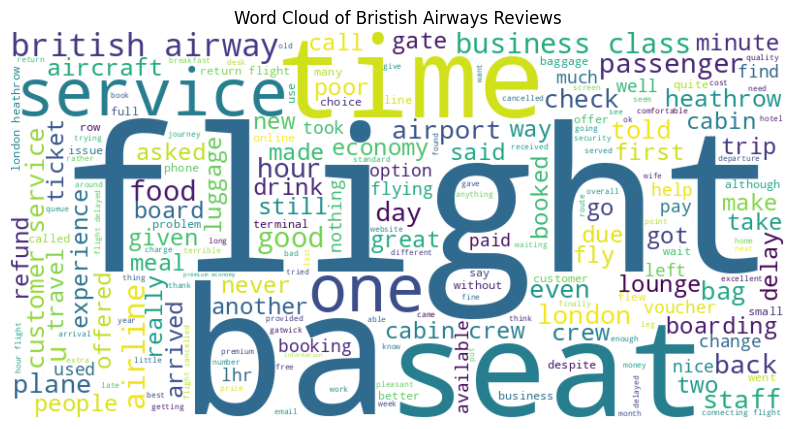

In [39]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

# Combine all reviews into a single string
all_reviews = ' '.join(df['cleaned_review'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Bristish Airways Reviews')
plt.axis('off')
plt.show()


There are many words that does not set the idea of whether the review is positive or negative. For example words like "passenger", "flight", etc. does not add conlcusive value hence we can include them in stopwords list.

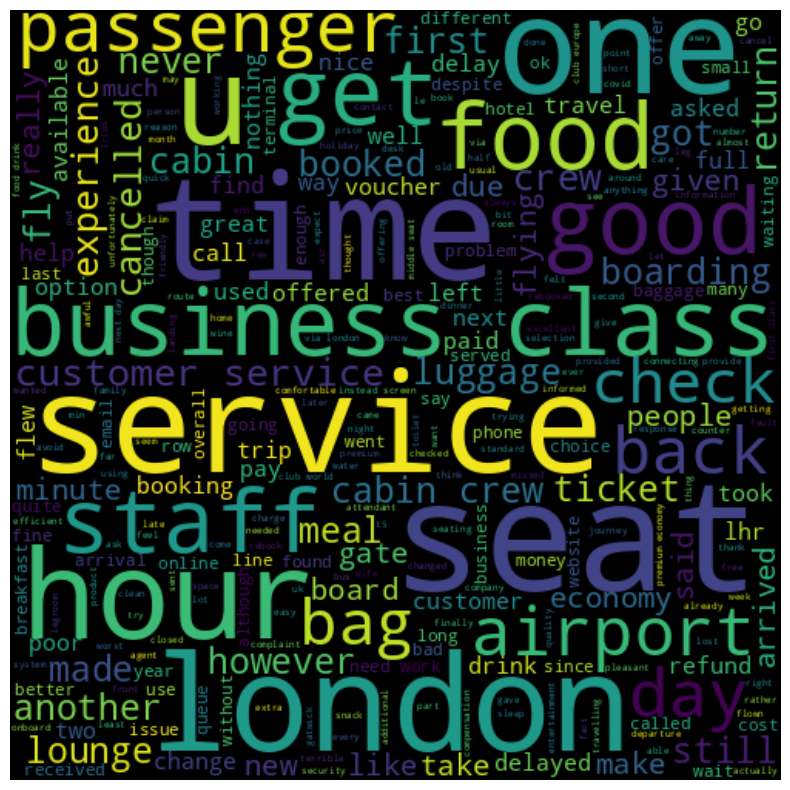

In [153]:
all_reviews = " ".join(df['cleaned_review'])
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))
stopwords.update(["ba","flight", "british","airway", "airline","plane", "told","also","passenger" \
                 "london", "heathrow", "aircraft", "could","even", "would"])
# Create and generate a word cloud image:
wordcloud = WordCloud(height=500,width=500,max_font_size=100, max_words=300, stopwords=stopwords).generate(all_reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### **Word Frequency**

In [154]:
from nltk import ngrams
from nltk.probability import FreqDist

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

#split the text of all reviews into a list of words
words = all_reviews.split(" ")

#remove certain words that will not be used to determine the positive or negative sentiment
stopwords = text.ENGLISH_STOP_WORDS.union(['flight', 'ba', "passenger","u", "london","airway","british","airline",\
                                           "heathrow","plane","lhr","review"])


new_words = [word for word in words if word not in stopwords]

nlp_words=FreqDist(new_words).most_common(20)

#create a dataframe of these word and its frequencies
all_fdist = pd.Series(dict(nlp_words))

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'seat'),
  Text(1, 0, 'service'),
  Text(2, 0, 'time'),
  Text(3, 0, 'hour'),
  Text(4, 0, 'crew'),
  Text(5, 0, 'class'),
  Text(6, 0, 'food'),
  Text(7, 0, 'good'),
  Text(8, 0, 'business'),
  Text(9, 0, 'staff'),
  Text(10, 0, 'cabin'),
  Text(11, 0, 'customer'),
  Text(12, 0, 'day'),
  Text(13, 0, 'airport'),
  Text(14, 0, 'bag'),
  Text(15, 0, 'check'),
  Text(16, 0, 'told'),
  Text(17, 0, 'experience'),
  Text(18, 0, 'boarding'),
  Text(19, 0, 'economy')])

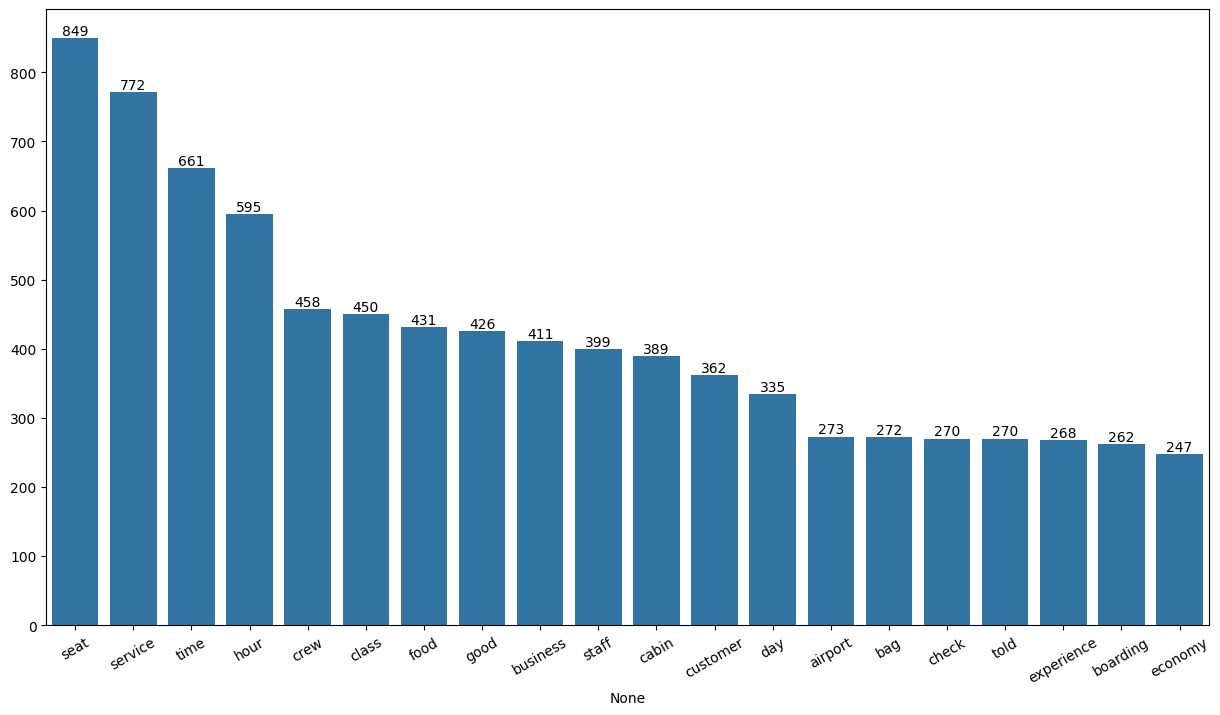

In [155]:
## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(15,8))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30)

The most frequently mentioned aspects in British Airways customer reviews are "seat," "service," and "time," indicating these are primary areas of concern. Other significant topics include "crew," "staff," and "cabin," reflecting the importance of onboard experience and personnel. Discussions about "food" and different travel "classes" are also prevalent, highlighting varying experiences across classes. Operational aspects like flight "hour," "airport," and processes such as "check" and "boarding" are notable, as well as customer service and overall "experience." Addressing these focal points can enhance passenger satisfaction and service quality.

<Axes: >

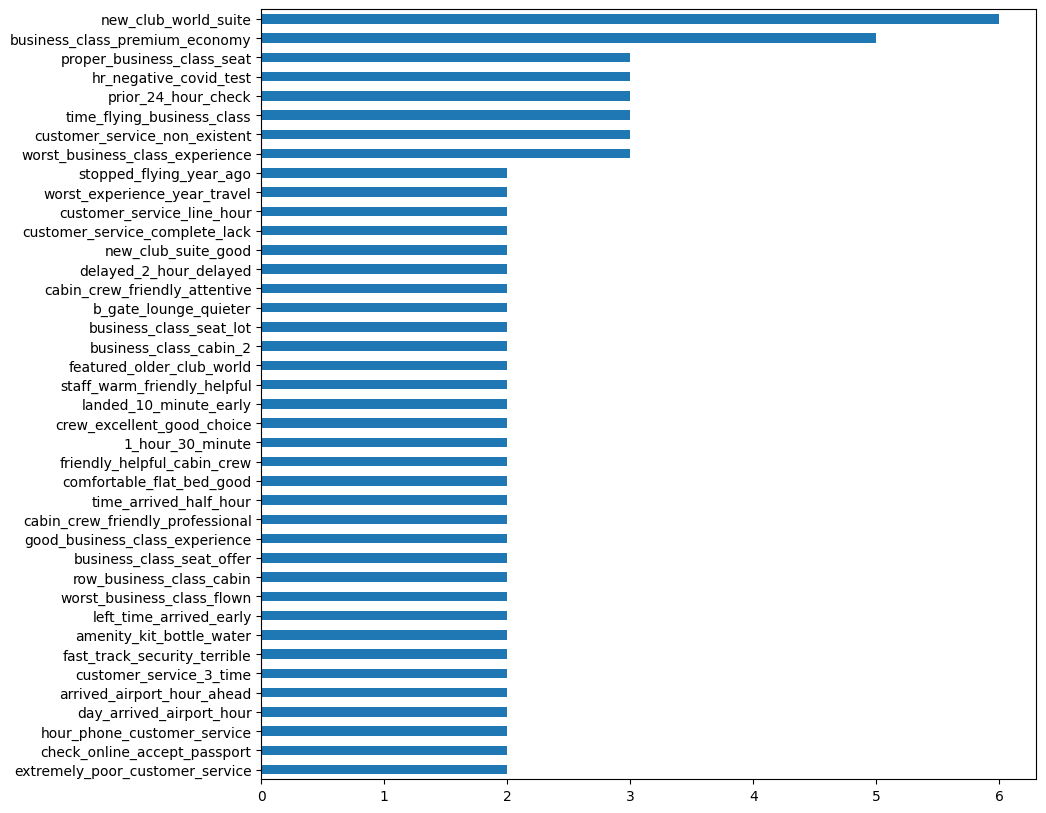

In [156]:
## Imports
import nltk.collocations as collocations
from nltk import FreqDist, bigrams

all_reviews = " ".join(df['cleaned_review'])

#split the text of all reviews into a list of words
words = all_reviews.split(" ")

new_words = [word for word in words if word not in stopwords]

def get_freq_dist(new_words,number_of_ngrams ):
    from nltk import ngrams

    ## Generate bigrams
    ngrams = ngrams(new_words, number_of_ngrams)

    ## Creating FreqDist
    ngram_fd = FreqDist(ngrams).most_common(40)

    ## Sort values by highest frequency
    ngram_sorted = {k:v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Join bigram tokens with '_' + maintain sorting
    ngram_joined = {'_'.join(k):v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Convert to Pandas series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)
    plt.figure(figsize=(10,10))
    ax = ngram_freqdist.plot(kind="barh")

    return ax


get_freq_dist(new_words,4)

The most frequently mentioned 4-gram phrases in British Airways customer reviews highlight key areas of focus such as the business class experience, with both positive mentions like "new_club_world_suite" and negative ones like "worst_business_class_experience." Significant concerns about customer service are evident from phrases like "customer_service_non_existent" and "extremely_poor_customer_service." Timing and punctuality issues are frequently discussed, with mentions of delays and check-in processes. Positive feedback is noted about the cabin crew and staff, while other aspects such as in-flight amenities and airport facilities also receive attention. Addressing these areas can enhance overall passenger satisfaction.

In [158]:
ratings_1_3 = df[df.Stars.isin([1,2,3])]
ratings_4_6 = df[df.Stars.isin([4,5,6])]
ratings_7_10 = df[df.Stars.isin([7,8,9,10])]

<Axes: >

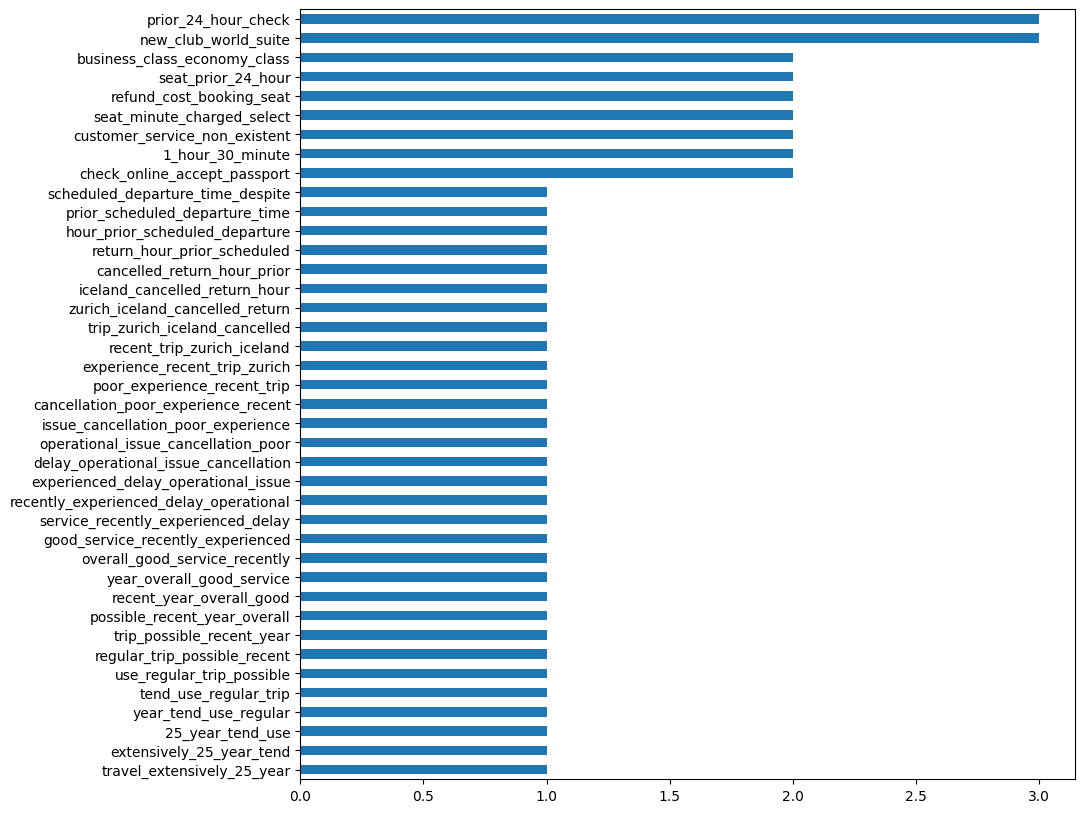

In [159]:
reviews_1_3 = " ".join(ratings_1_3['cleaned_review'])
reviews_4_6 = " ".join(ratings_4_6['cleaned_review'])
reviews_7_10 = " ".join(ratings_7_10['cleaned_review'])

#split the text of all reviews into a list of words
words_1_3 = reviews_1_3.split(" ")
words_4_6 = reviews_4_6.split(" ")
words_7_10 = reviews_7_10.split(" ")


new_words_7_10 = [word for word in words_7_10 if word not in stopwords]

get_freq_dist(new_words_7_10,4)

The most frequently mentioned 4-gram phrases in high-rated (7-10) British Airways customer reviews include "prior_24_hour_check," "new_club_world_suite," and "business_class_economy_class," indicating positive experiences with check-in procedures and specific seating classes. Other common phrases such as "seat_prior_24_hour" and "refund_cost_booking_seat" suggest efficient seat selection and refund processes. However, phrases like "customer_service_non_existent" and "operational_issue_cancellation_poor" highlight occasional negative feedback related to customer service and operational issues. Overall, the reviews reflect a mix of positive experiences with certain services and areas needing improvement.

<Axes: >

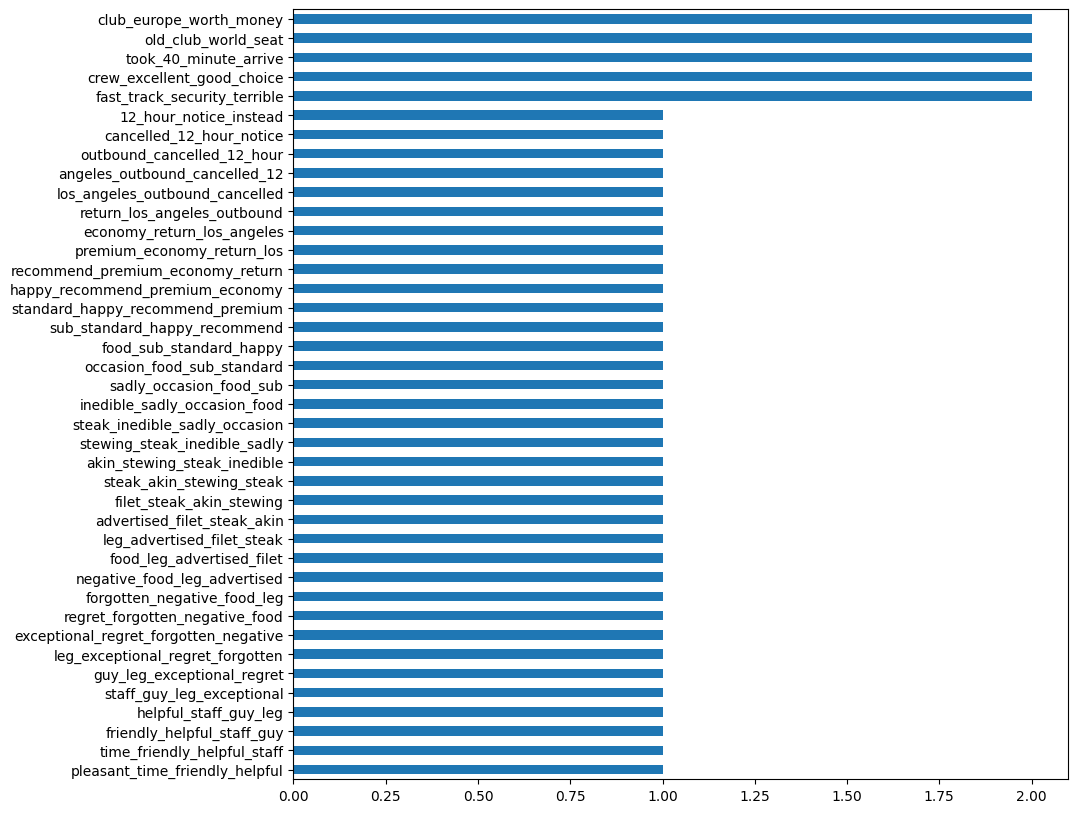

In [160]:
new_words = [word for word in words_4_6 if word not in stopwords]

get_freq_dist(new_words,4)

<Axes: >

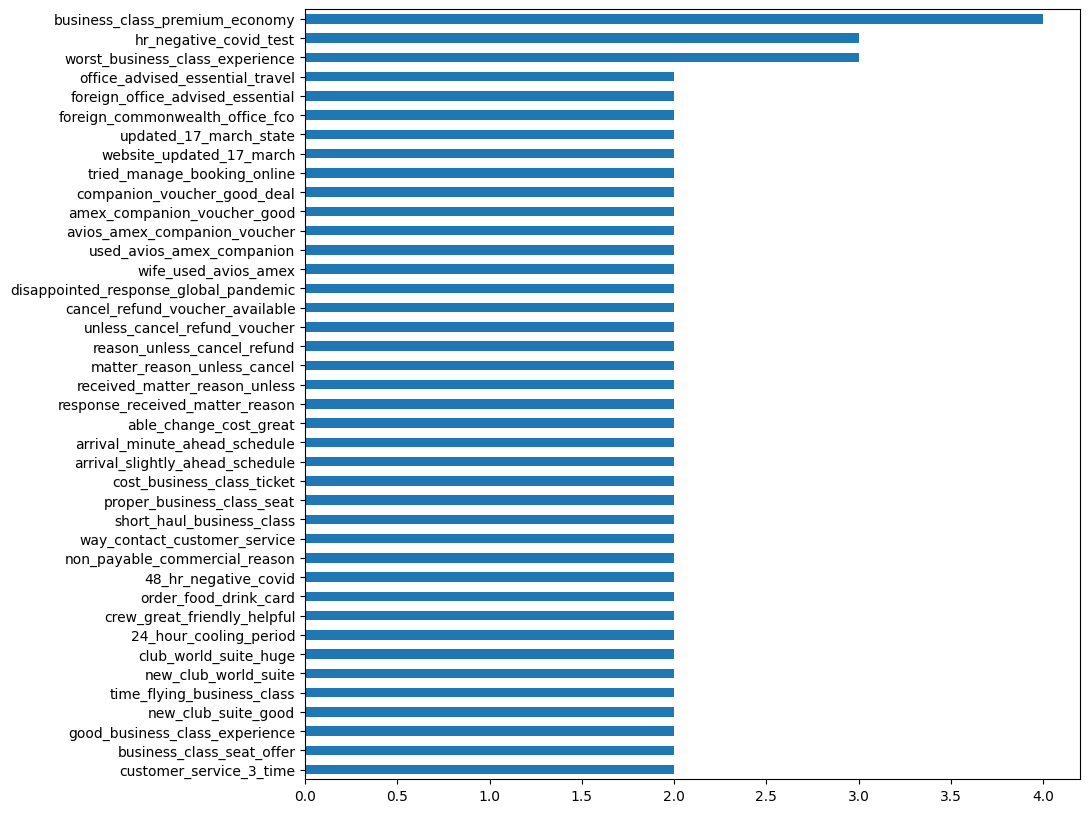

In [161]:
new_words = [word for word in words_1_3 if word not in stopwords]

get_freq_dist(new_words,4)

The frequency distribution chart for words from lower-rated reviews (ratings 1 to 3) reveals a notable prevalence of negative terms. Words such as “disappointed,” “worst,” and “poor” frequently occur, indicating common areas of customer dissatisfaction. Operational terms like “cancelled” and “delayed” also feature prominently, suggesting specific service aspects that may require attention. This visualization aids in pinpointing critical feedback themes, which can guide improvements in service quality and customer experience strategies.

### **Distribution of Sentiment Labels by Verification Status (Combination of TextBlob, Vader and roBERTa)**

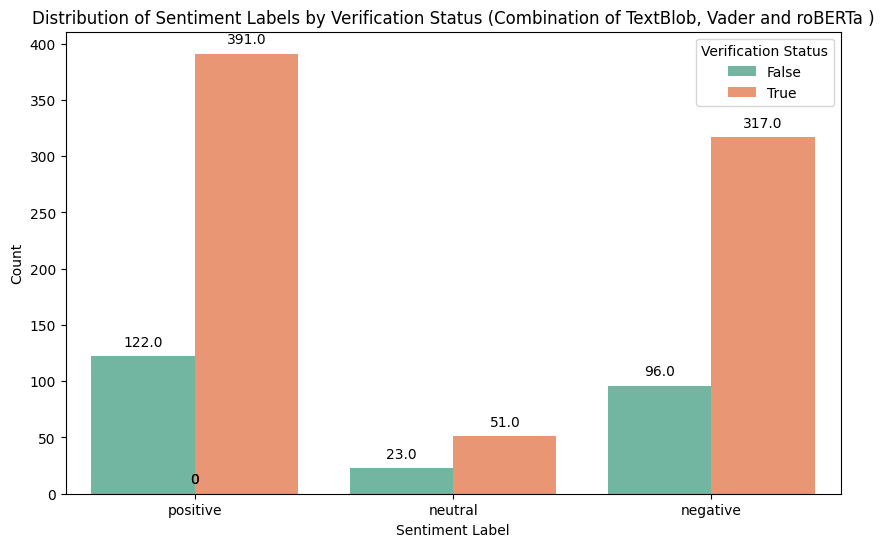

In [40]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='majority_sentiment', hue='Verification Status', data=df, palette='Set2')
plt.title('Distribution of Sentiment Labels by Verification Status (Combination of TextBlob, Vader and roBERTa )')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')

# Adding data labels to the plot
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

The chart reveals a generally positive sentiment towards British Airways, with more reviews categorized as positive than negative. Interestingly, the distribution of positive, neutral, and negative sentiment appears similar between verified and non verified reviews, suggesting verification status may not significantly impact overall sentiment.

### **Distribution of Sentiment Labels by Verification Status (Using TextBlob)**

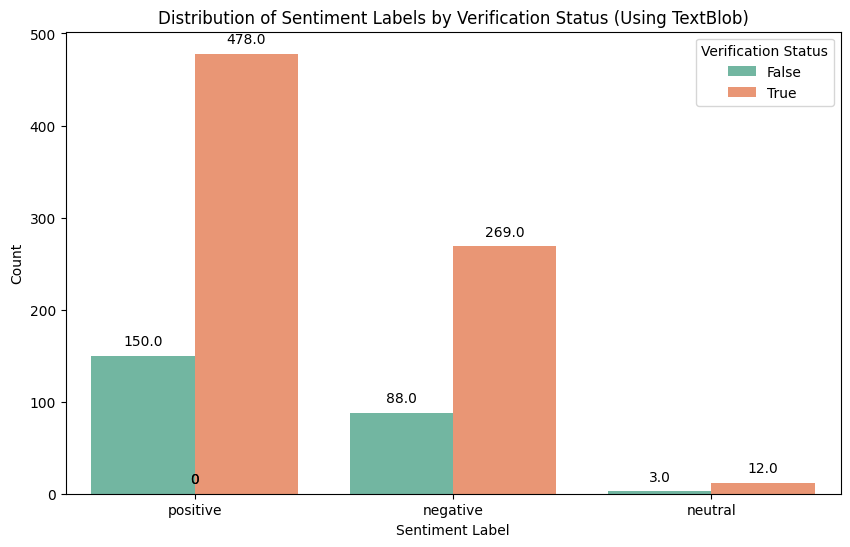

In [41]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='textblob_sentiment', hue='Verification Status', data=df, palette='Set2')
plt.title('Distribution of Sentiment Labels by Verification Status (Using TextBlob)')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')

# Adding data labels to the plot
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

The bar chart analyzes sentiment distribution in British Airways customer reviews using TextBlob. It reveals a positive overall sentiment, with more reviews classified as positive than negative. Interestingly, the distribution of positive, neutral, and negative sentiment seems similar between verified and non-verified reviews, suggesting verification status might not have a strong influence on sentiment.

### **Distribution of Sentiment Labels by Verification Status (Using Vader)**

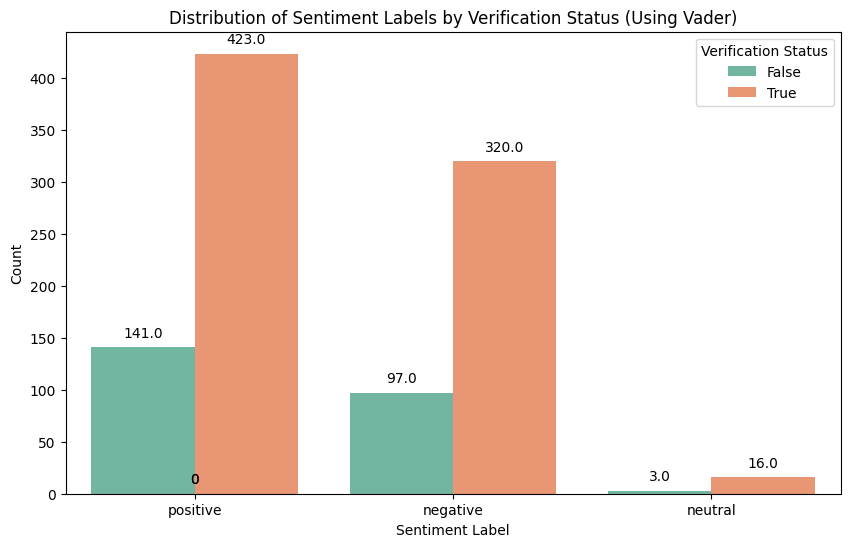

In [42]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='vader_sentiment', hue='Verification Status', data=df, palette='Set2')
plt.title('Distribution of Sentiment Labels by Verification Status (Using Vader)')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')

# Adding data labels to the plot
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

### **Distribution of Sentiment Labels by Verification Status (Using roBERTa)**

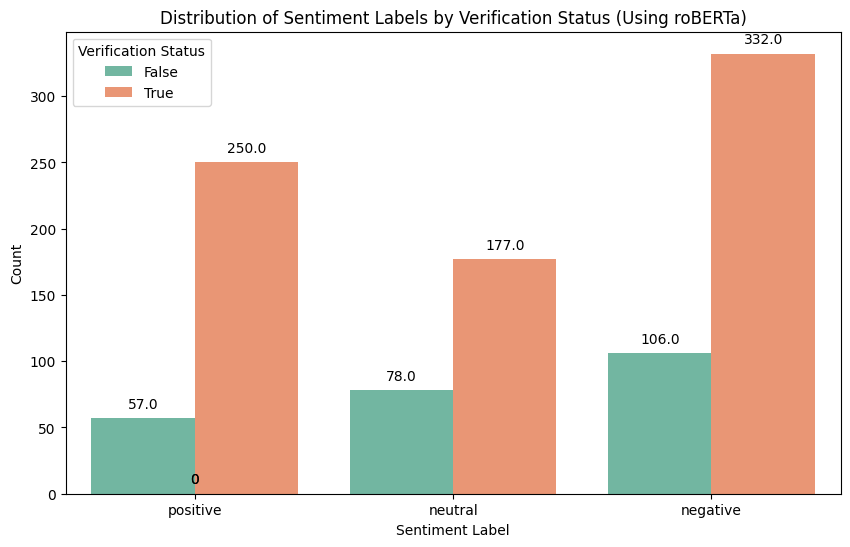

In [43]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='roberta_sentiment', hue='Verification Status', data=df, palette='Set2')
plt.title('Distribution of Sentiment Labels by Verification Status (Using roBERTa)')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')

# Adding data labels to the plot
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

roBERTa sentiment analysis reveals a concerning trend in British Airways reviews. Negative reviews dominate both verified and non-verified categories. While there are positive and neutral reviews present, the overall sentiment leans negative, suggesting potential areas for improvement in the customer experience.

### **Number of Reviews by Verification Status**

<ipython-input-44-62a50daa0ef9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Verification Status', data=df, palette='Set2')


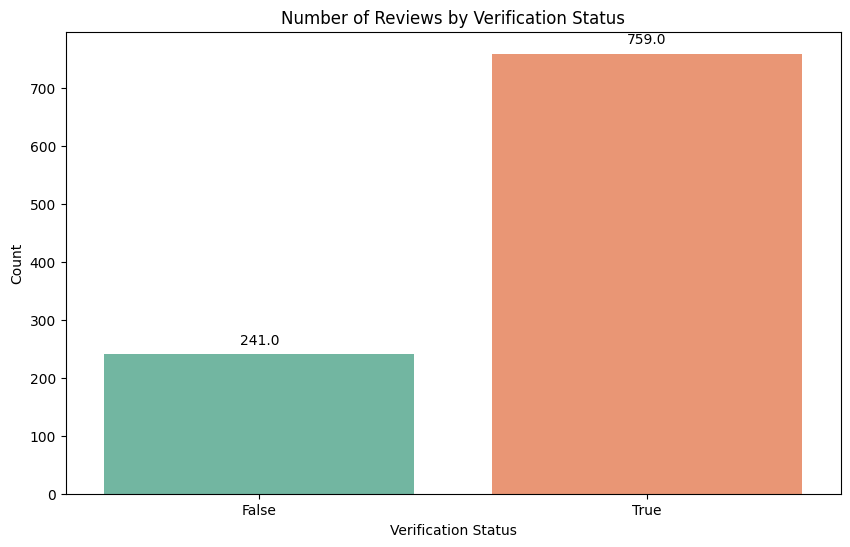

In [44]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Verification Status', data=df, palette='Set2')
plt.title('Number of Reviews by Verification Status')
plt.xlabel('Verification Status')
plt.ylabel('Count')

# Adding data labels to the plot
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

### **Distribution of Star Ratings**

<ipython-input-46-6046110e4477>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Stars', data=df, palette='viridis')


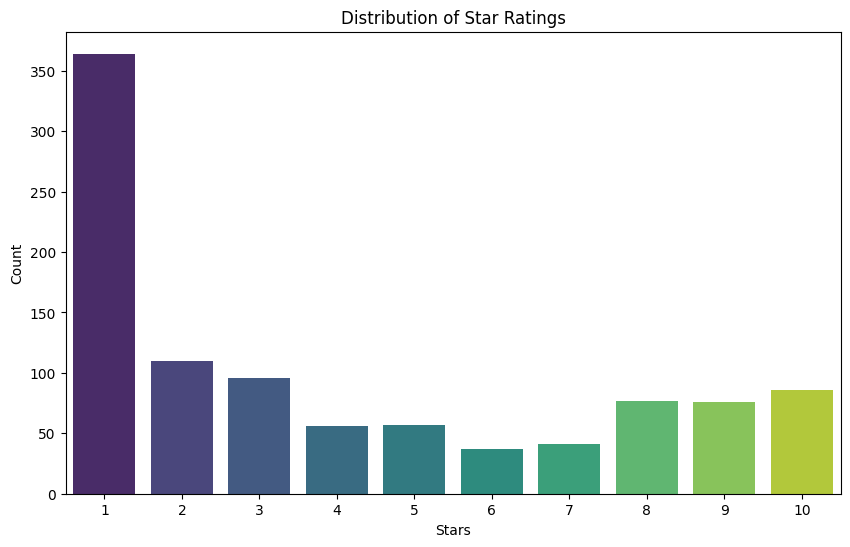

In [46]:

plt.figure(figsize=(10, 6))
sns.countplot(x='Stars', data=df, palette='viridis')
plt.title('Distribution of Star Ratings')
plt.xlabel('Stars')
plt.ylabel('Count')
plt.show()


The countplot  reveals a significant skew towards the lower end of the rating scale, with the most frequent rating being 1 star. This predominance of lower ratings suggests that there are areas where customer satisfaction could be enhanced. The descending order of counts as ratings increase indicates that fewer customers have given higher scores, which is critical for identifying trends in customer sentiment and pinpointing opportunities for service improvement. This visual data underscores the importance of addressing customer concerns to elevate overall satisfaction levels.

### **Monthly Sentiment Label Trends**

In [77]:
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['week_of_month'] = df['Date'].dt.day // 7 + 1
df['month_name'] = df['Date'].dt.strftime('%B')  # Full month name
df['day_name'] = df['Date'].dt.strftime('%A')

In [92]:
# Grouping by month and sentiment labels
monthly_sentiment_counts = df.groupby(['month_name', 'majority_sentiment']).size().reset_index(name='count')
# Define the order of months for plotting
months_order = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']

# Reorder the 'month_name' column based on the predefined order
monthly_sentiment_counts['month_name'] = pd.Categorical(monthly_sentiment_counts['month_name'], categories=months_order, ordered=True)

In [94]:
# Grouping by day and sentiment labels
daily_sentiment_counts = df.groupby(['day_name', 'majority_sentiment']).size().reset_index(name='count')

# Define the order of days for plotting (Monday to Sunday)
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Reorder the 'day_name' column based on the predefined order
daily_sentiment_counts['day_name'] = pd.Categorical(daily_sentiment_counts['day_name'], categories=days_order, ordered=True)


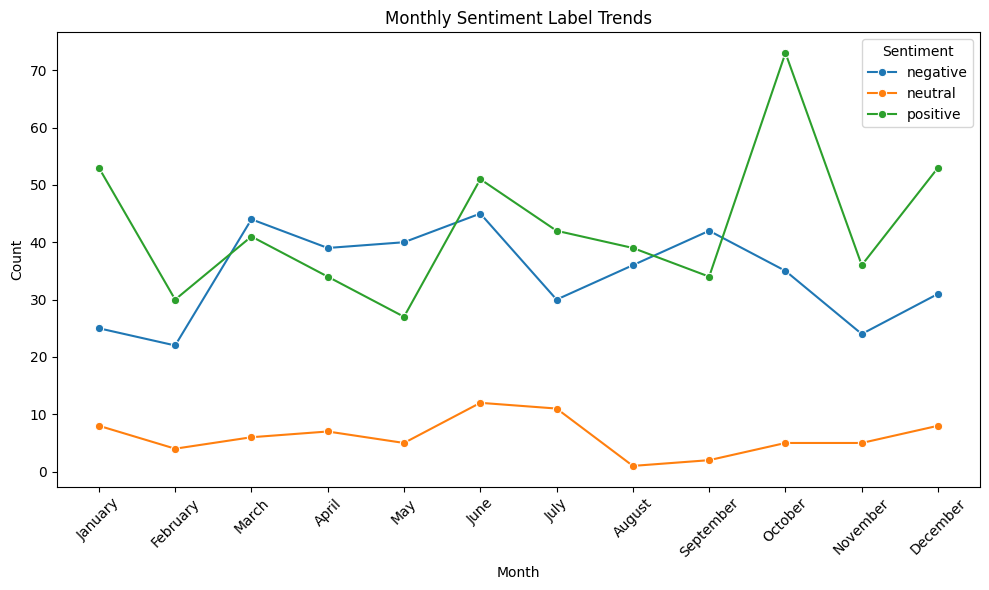

In [95]:


# Example: Plotting monthly sentiment label trends
plt.figure(figsize=(10, 6))
sns.lineplot(x='month_name', y='count', hue='majority_sentiment', data=monthly_sentiment_counts, marker='o')
plt.title('Monthly Sentiment Label Trends')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()


The "Monthly Sentiment Label Trends" chart illustrates the distribution of sentiment labels (negative, neutral, positive) in British Airways customer reviews throughout the year. Positive sentiments are generally the most frequent, with significant peaks in January and October. Negative sentiments remain relatively steady across the months, while neutral sentiments show minor fluctuations but are consistently lower in count compared to the other sentiments. This trend suggests that customers tend to have more positive experiences, with notable increases in satisfaction during specific months, indicating potential seasonal influences on customer sentiment.

### **Daily Sentiment Label Trends**

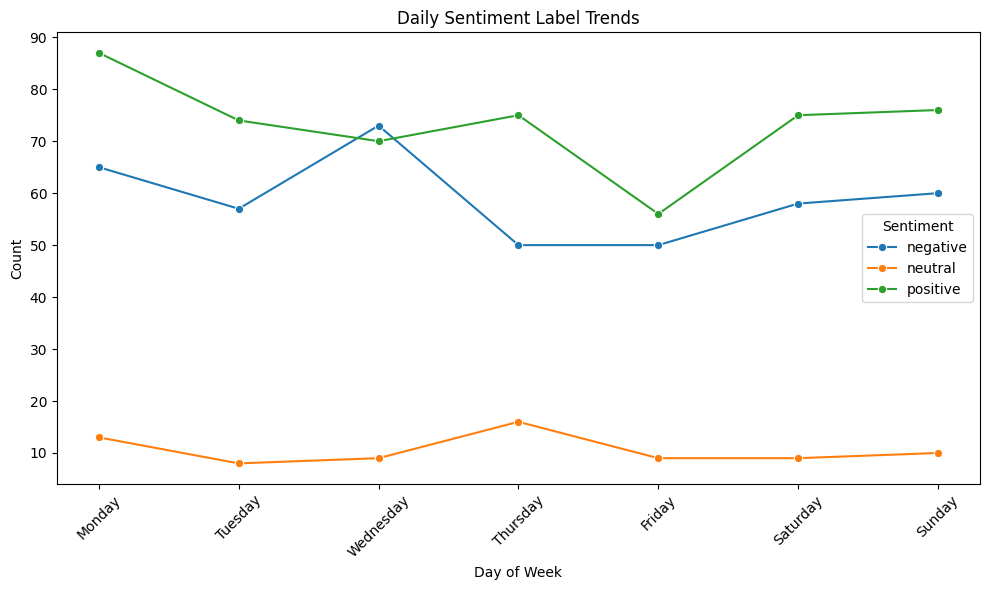

In [96]:
# Example: Plotting daily sentiment label trends
plt.figure(figsize=(10, 6))
sns.lineplot(x='day_name', y='count', hue='majority_sentiment', data=daily_sentiment_counts, marker='o')
plt.title('Daily Sentiment Label Trends')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()


The "Daily Sentiment Label Trends" chart shows the distribution of sentiment labels (negative, neutral, positive) in British Airways customer reviews across the days of the week. Positive sentiments are the most frequent each day, with a noticeable peak on Monday and a steady increase towards the weekend. Negative sentiments show a slight rise mid-week, peaking on Wednesday, and then decrease towards the weekend. Neutral sentiments remain consistently low throughout the week. This pattern indicates that customer experiences are generally more positive, with certain days, particularly Mondays and weekends, showing higher satisfaction levels.

In [124]:
# Grouping by country and month, and aggregating sentiment labels
country_sentiment_counts = df.groupby(['Country', 'majority_sentiment']).size().reset_index(name='count')

# Selecting top 5 countries based on total sentiment count
top_countries = country_sentiment_counts.groupby('Country')['count'].sum().nlargest(5).index

# Filtering data for top 5 countries
top_country_sentiment = country_sentiment_counts[country_sentiment_counts['Country'].isin(top_countries)]


In [125]:
top_country_sentiment

,Country,majority_sentiment,count
2,Australia,negative,24
3,Australia,neutral,2
4,Australia,positive,10
12,Canada,negative,18
13,Canada,neutral,2
14,Canada,positive,15
69,South Africa,negative,9
70,South Africa,neutral,1
71,South Africa,positive,8
86,United Kingdom,negative,200


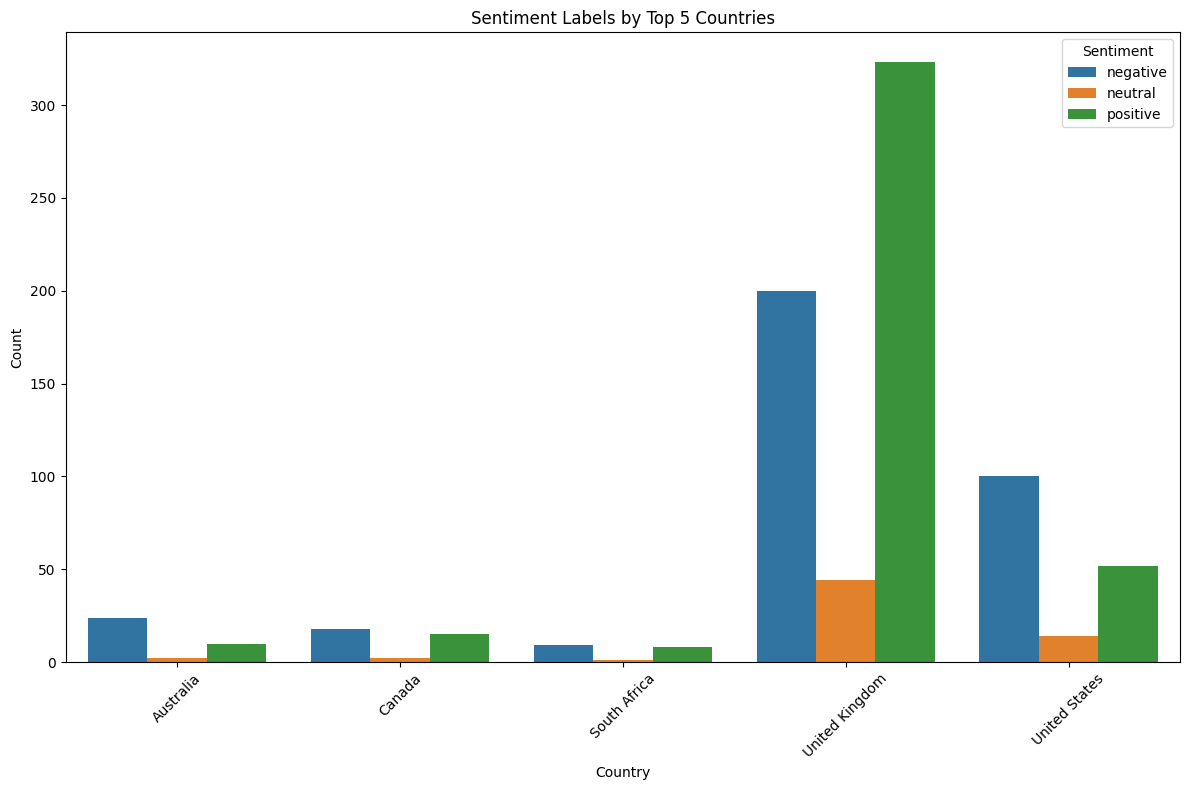

In [131]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Country', y='count', hue='majority_sentiment', data=top_country_sentiment,)
plt.title('Sentiment Labels by Top 5 Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

The bar chart displays the distribution of sentiment labels (negative, neutral, positive) for British Airways customer reviews from the top five countries. The United Kingdom has the highest number of reviews overall, with a notable majority being positive, followed by a significant number of negative reviews and a small portion of neutral reviews. The United States shows a considerable number of both positive and negative reviews, with fewer neutral ones. Australia, Canada, and South Africa have relatively fewer reviews, with a higher prevalence of negative sentiment in Australia and Canada, and a balanced distribution in South Africa. This indicates varying levels of customer satisfaction across different countries, with the UK showing the most positive feedback

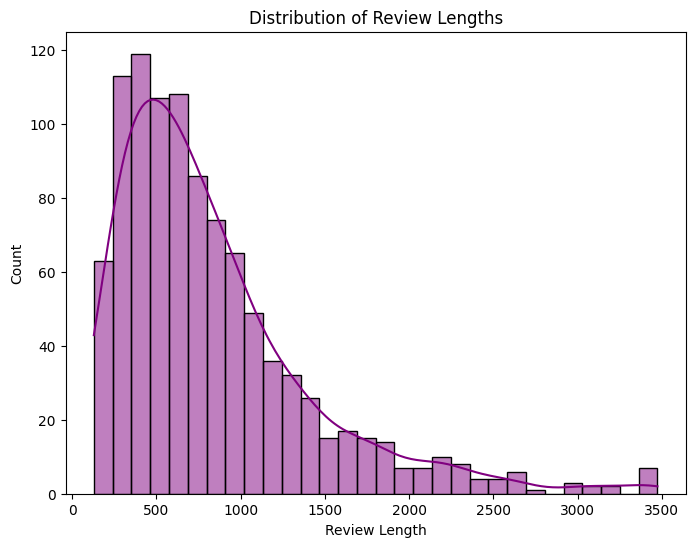

In [135]:

df['review_length'] = df['Review'].apply(len)
plt.figure(figsize=(8, 6))
sns.histplot(df['review_length'], bins=30, kde=True, color='purple')
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Count')
plt.show()


The distribution of review lengths for British Airways customers displays a positive skew, with a concentration of reviews falling between 300 and 800 words. This indicates that most customers tend to write lengthier reviews, potentially providing a rich source of detailed feedback

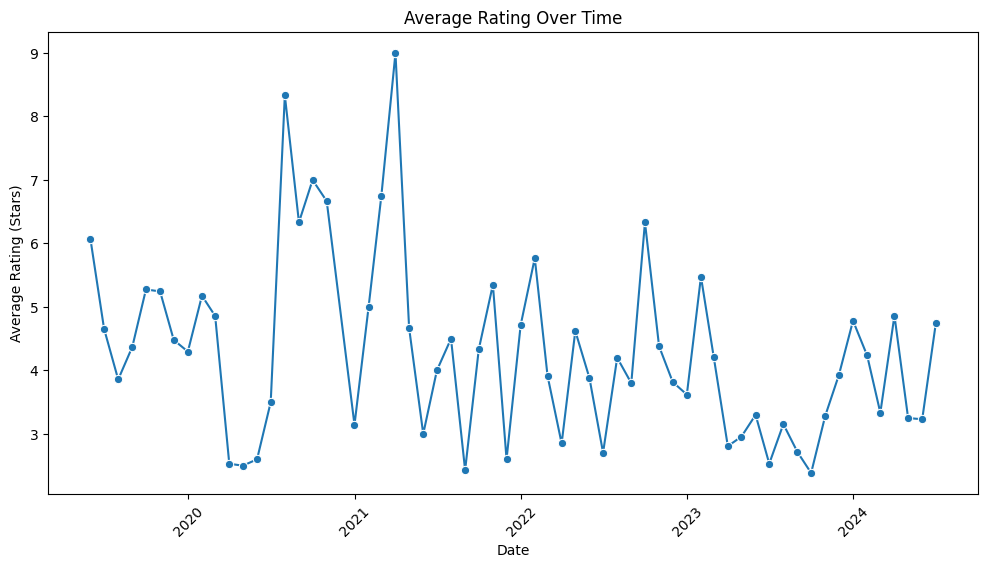

In [141]:


# Calculate average rating per month
average_rating_monthly = df.resample('M', on='Date')['Stars'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Stars', data=average_rating_monthly, marker='o')
plt.title('Average Rating Over Time')
plt.xlabel('Date')
plt.ylabel('Average Rating (Stars)')
plt.xticks(rotation=45)
plt.show()


The line plot shows the trend of average ratings for British Airways over time from 2020 to 2024. There is significant variability in customer satisfaction, with noticeable peaks and troughs throughout the period. Ratings reached a high point in early 2021 and mid-2022 but also experienced several low points, particularly in mid-2020 and early 2023. The low points in mid-2020 could be attributed to the impact of the COVID-19 pandemic, which caused widespread disruptions in travel and airline operations. The overall trend indicates fluctuating customer experiences, suggesting periods of both high and low service quality. This variability highlights the need for consistent improvements to maintain higher customer satisfaction levels over time

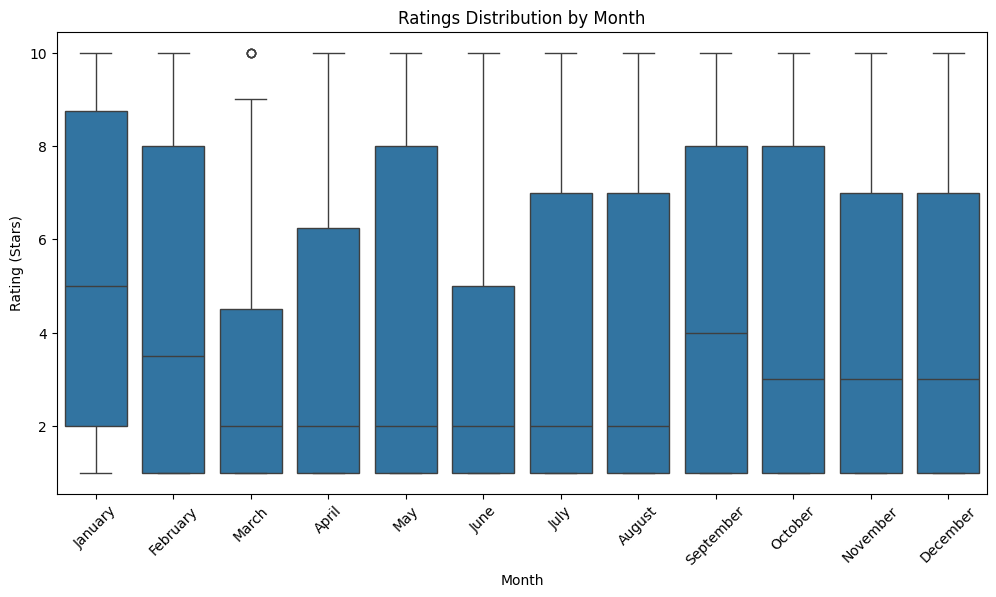

In [144]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='month_name', y='Stars', data=df, order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.title('Ratings Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Rating (Stars)')
plt.xticks(rotation=45)
plt.show()


The "Ratings Distribution by Month" chart provides an overview of customer ratings for British Airways over a year. January has the highest median rating, indicating generally positive customer experiences at the beginning of the year. March and June show a wider range of ratings with lower medians, suggesting more mixed reviews during these months. Most months have a consistent distribution of ratings, with medians around the middle of the scale, except for a few outliers. Overall, this pattern reveals fluctuations in customer satisfaction, with notable peaks and troughs at different times of the year.

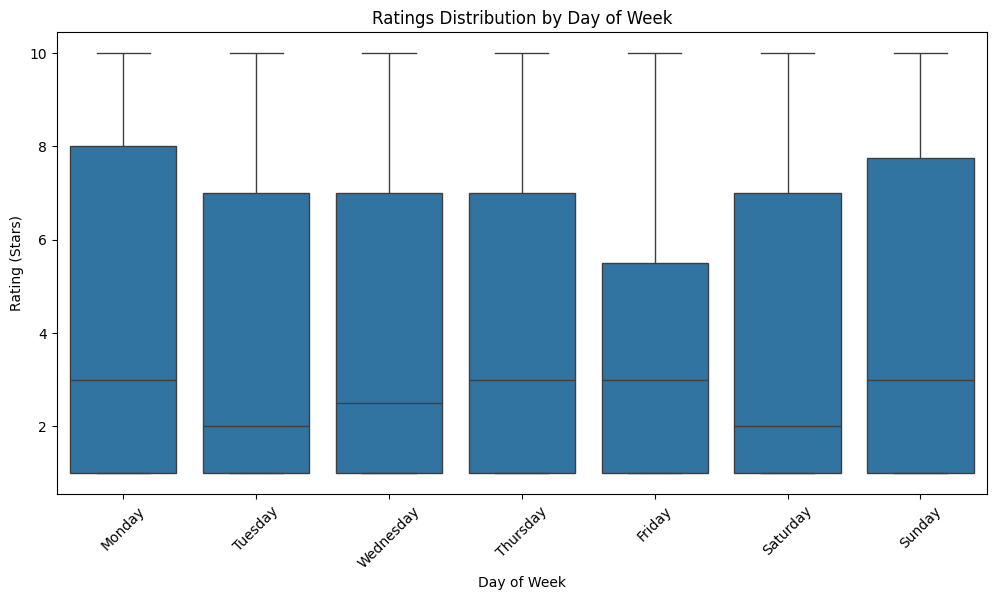

In [145]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='day_name', y='Stars', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Ratings Distribution by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Rating (Stars)')
plt.xticks(rotation=45)
plt.show()


The boxplot provides a comparative view of British Airways’ customer ratings across different days. The median ratings are fairly consistent, with no significant outliers, suggesting uniformity in customer experiences throughout the week. This consistency indicates that the day of the week does not significantly influence customers’ perceptions of service quality. Such insights can be valuable for maintaining service standards and ensuring customer satisfaction is steady regardless of the day.

In [150]:
# Grouping by Country to get the top 5 countries by review count
top_2_countries = df['Country'].value_counts().nlargest(2).index

# Filtering the DataFrame for the top 5 countries
top_2_df = df[df['Country'].isin(top_2_countries)]


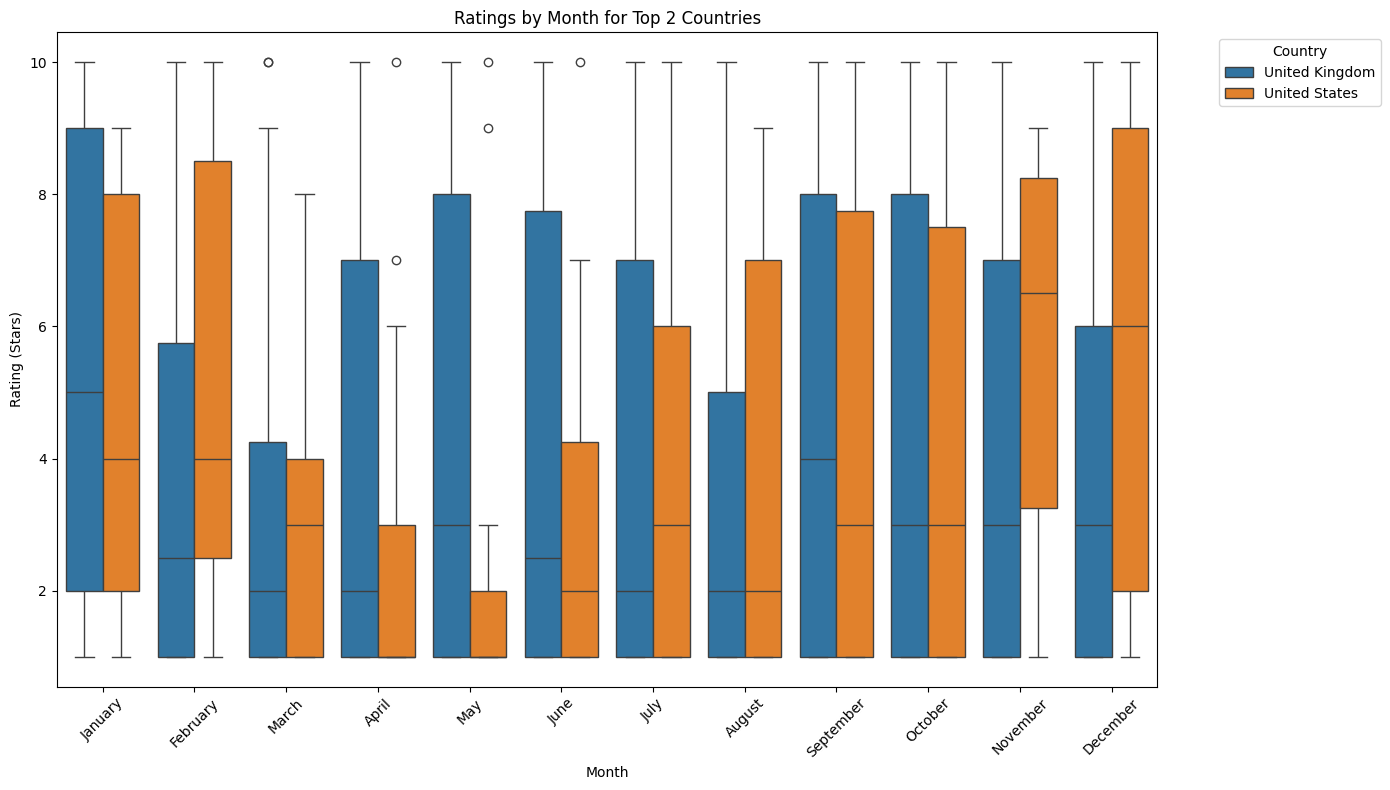

In [151]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='month_name', y='Stars', hue='Country', data=top_2_df, order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.title('Ratings by Month for Top 2 Countries')
plt.xlabel('Month')
plt.ylabel('Rating (Stars)')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The box plot compares the monthly distribution of ratings between the United Kingdom and the United States for British Airways. Overall, the United Kingdom exhibits a higher median rating each month compared to the United States, with more consistent ratings throughout the year. In contrast, the United States shows greater variability and generally lower median ratings, particularly in the months of February, March, April, and May. Both countries display some months with a wide range of ratings, indicating varied customer experiences. This suggests that British Airways has a more favorable perception in the United Kingdom than in the United States, with significant fluctuations in customer satisfaction.

<ipython-input-152-c2e19569e061>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Stars', y='Country', data=top_12_countries, palette='viridis')


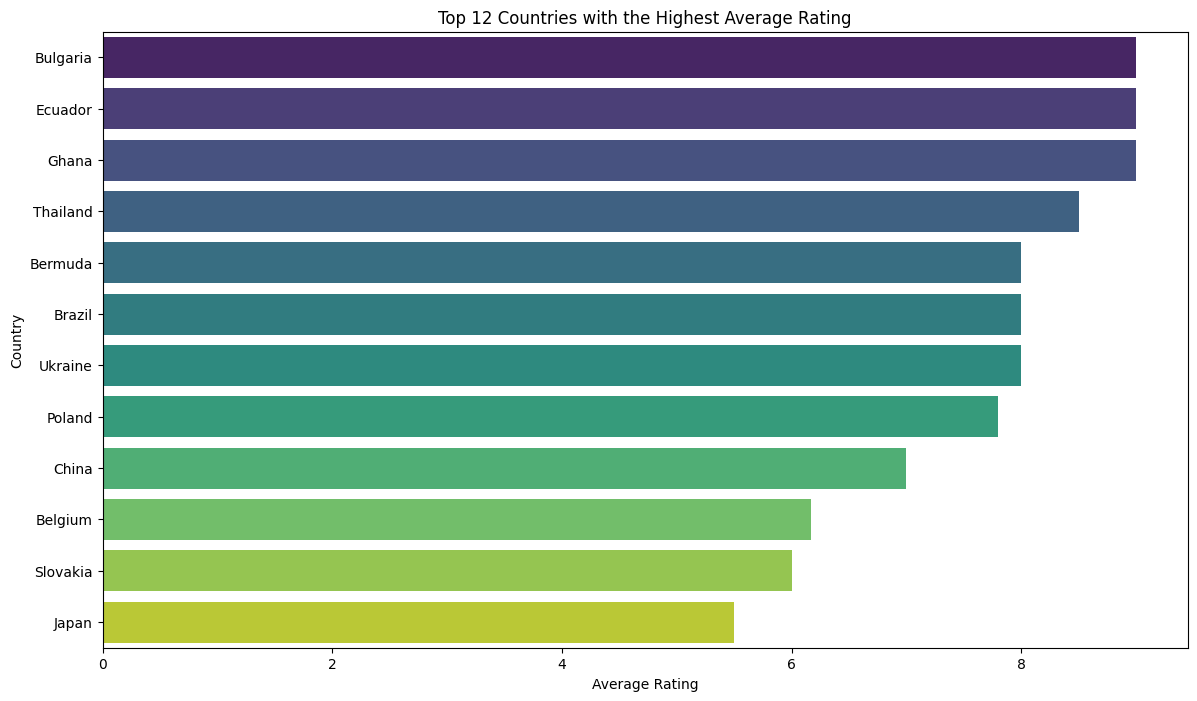

In [152]:
# Grouping by Country and calculating the average rating
avg_rating_by_country = df.groupby('Country')['Stars'].mean().reset_index()

# Selecting the top 12 countries based on the highest average rating
top_12_countries = avg_rating_by_country.nlargest(12, 'Stars')

# Plotting the bar plot for the top 12 countries with the highest average rating
plt.figure(figsize=(14, 8))
sns.barplot(x='Stars', y='Country', data=top_12_countries, palette='viridis')
plt.title('Top 12 Countries with the Highest Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Country')
plt.show()

The bar chart presents a clear visual representation of customer satisfaction levels for British Airways across different countries. Notably, the chart reveals that Bulgaria leads with the highest average rating, suggesting a particularly positive customer experience in this country. Conversely, Japan is at the bottom of these twelve countries, indicating a lower perceived service quality. This data could be instrumental in identifying areas for service improvement and tailoring customer experience strategies to specific regional markets. Overall, the chart serves as a valuable tool for understanding and comparing customer sentiment in various countries.